In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")
sns.set_context("talk")

print("Libraries loaded successfully.")

Libraries loaded successfully.


In [14]:
train_path = "/app/output/train.csv"
val_path   = "/app/output/val.csv"
test_path  = "/app/output/test.csv"

train_df = pd.read_csv(train_path, encoding="utf-8-sig")
val_df   = pd.read_csv(val_path, encoding="utf-8-sig")
test_df  = pd.read_csv(test_path, encoding="utf-8-sig")

print(f"Train size: {len(train_df)}")
print(f"Val size:   {len(val_df)}")
print(f"Test size:  {len(test_df)}")

Train size: 2995
Val size:   374
Test size:  375


In [15]:
def add_text_length(df):
    df = df.copy()
    df["word_count"] = df["text"].str.split().apply(len)
    return df

train_df = add_text_length(train_df)
val_df   = add_text_length(val_df)
test_df  = add_text_length(test_df)

train_df[["word_count"]].describe()

,word_count
count,2995.000000
mean,51.246411
std,64.079662
min,1.000000
25%,21.000000
50%,38.000000
75%,62.000000
max,1186.000000


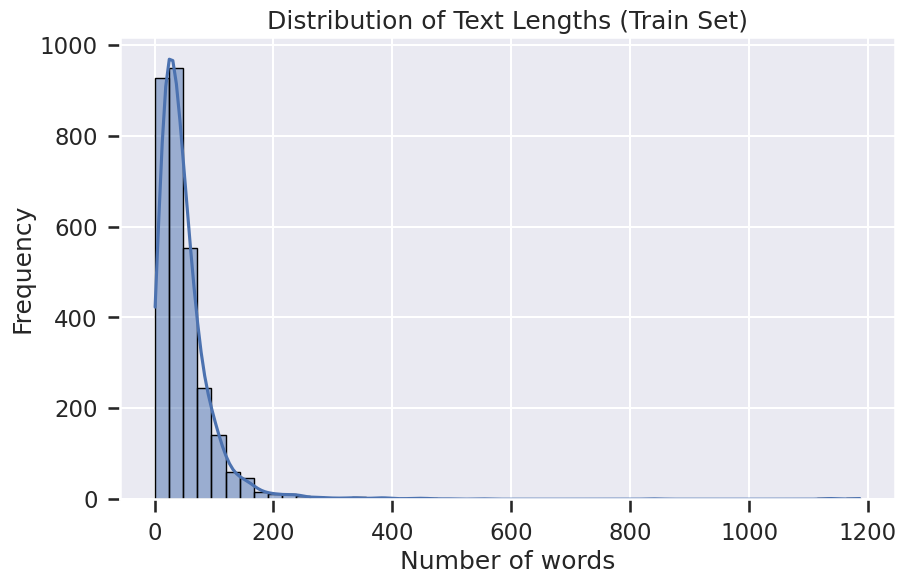

In [16]:
plt.figure(figsize=(10,6))
sns.histplot(train_df["word_count"], bins=50, kde=True)
plt.title("Distribution of Text Lengths (Train Set)")
plt.xlabel("Number of words")
plt.ylabel("Frequency")
plt.show()

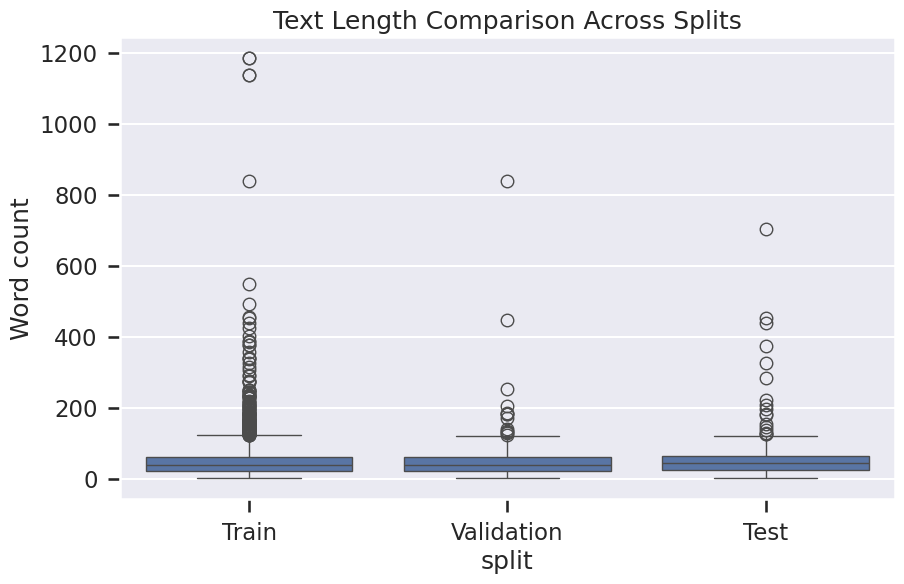

In [17]:
combined = pd.concat([
    train_df.assign(split="Train"),
    val_df.assign(split="Validation"),
    test_df.assign(split="Test")
])

plt.figure(figsize=(10,6))
sns.boxplot(data=combined, x="split", y="word_count")
plt.title("Text Length Comparison Across Splits")
plt.ylabel("Word count")
plt.show()

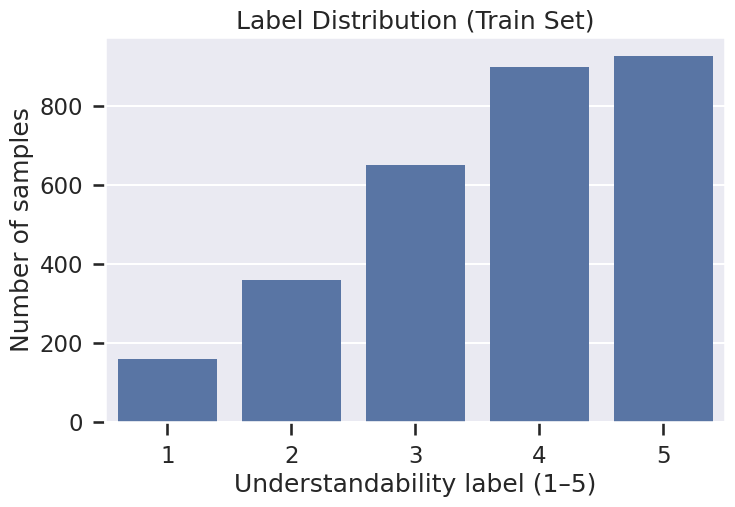

label
1    160
2    360
3    651
4    897
5    927
Name: count, dtype: int64

In [18]:
label_counts = train_df["label"].value_counts().sort_index()

plt.figure(figsize=(8,5))
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.title("Label Distribution (Train Set)")
plt.xlabel("Understandability label (1–5)")
plt.ylabel("Number of samples")
plt.show()

label_counts

In [19]:
(label_counts / label_counts.sum() * 100).round(2)

label
1     5.34
2    12.02
3    21.74
4    29.95
5    30.95
Name: count, dtype: float64

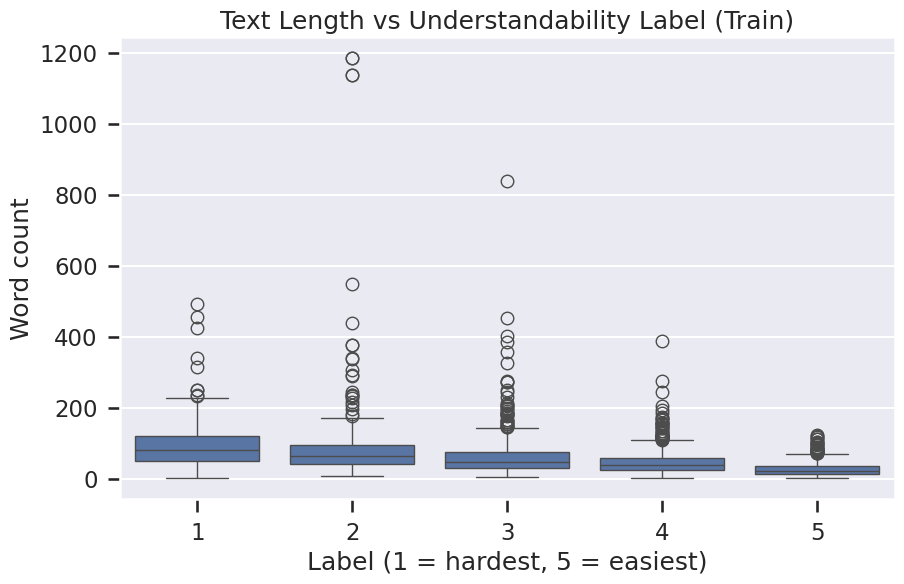

In [20]:
plt.figure(figsize=(10,6))
sns.boxplot(data=train_df, x="label", y="word_count")
plt.title("Text Length vs Understandability Label (Train)")
plt.xlabel("Label (1 = hardest, 5 = easiest)")
plt.ylabel("Word count")
plt.show()

In [21]:
train_df.groupby("label")["word_count"].mean().round(1)

label
1    98.0
2    90.0
3    62.1
4    45.7
5    25.9
Name: word_count, dtype: float64

In [22]:
corr = train_df["word_count"].corr(train_df["label"])
corr

-0.3571460315400593

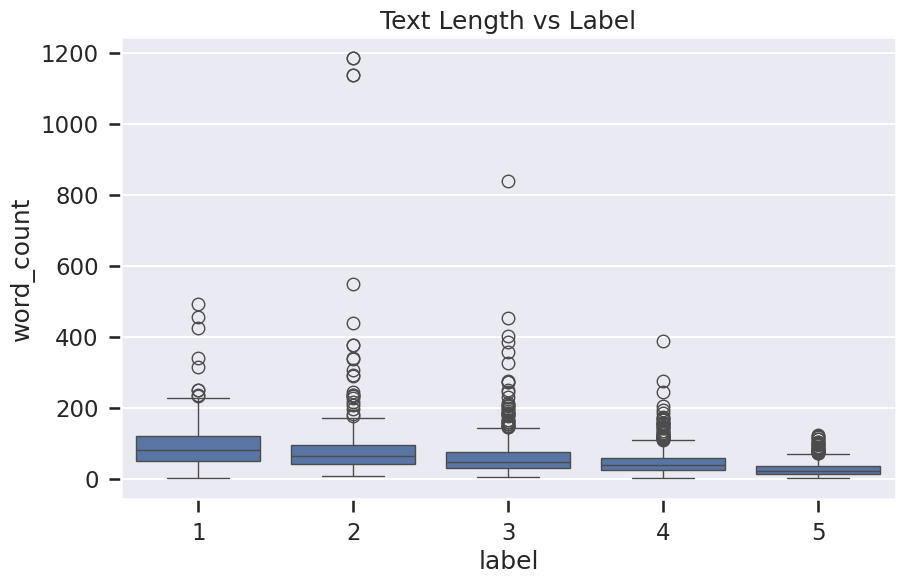

In [23]:
plt.figure(figsize=(10,6))
sns.boxplot(data=train_df, x="label", y="word_count")
plt.title("Text Length vs Label")
plt.show()